Stock Portfolio Visualization
Scenario: You have daily closing prices and trading volumes for 4 stocks over 10 days.
Tasks:

Line plot: Plot closing prices for all stocks with different line styles.

Bar plot: Plot trading volume per stock on day 5.

Error bars: Add ±2% error bars to price plots.

Stacked area plot: Show cumulative portfolio value over 10 days.

Annotations: Highlight the day with the maximum portfolio value.

Subplots: Create a 2x1 subplot figure: top = price trends, bottom = volume bar chart.

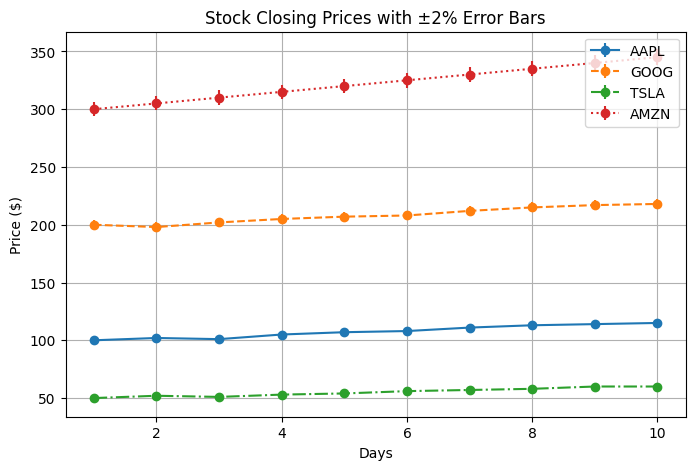

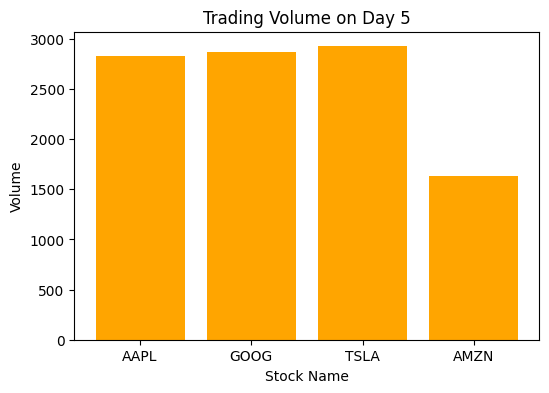

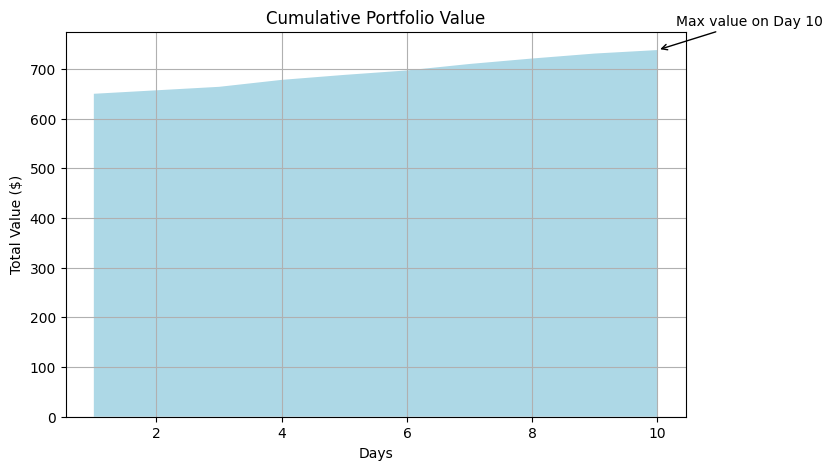

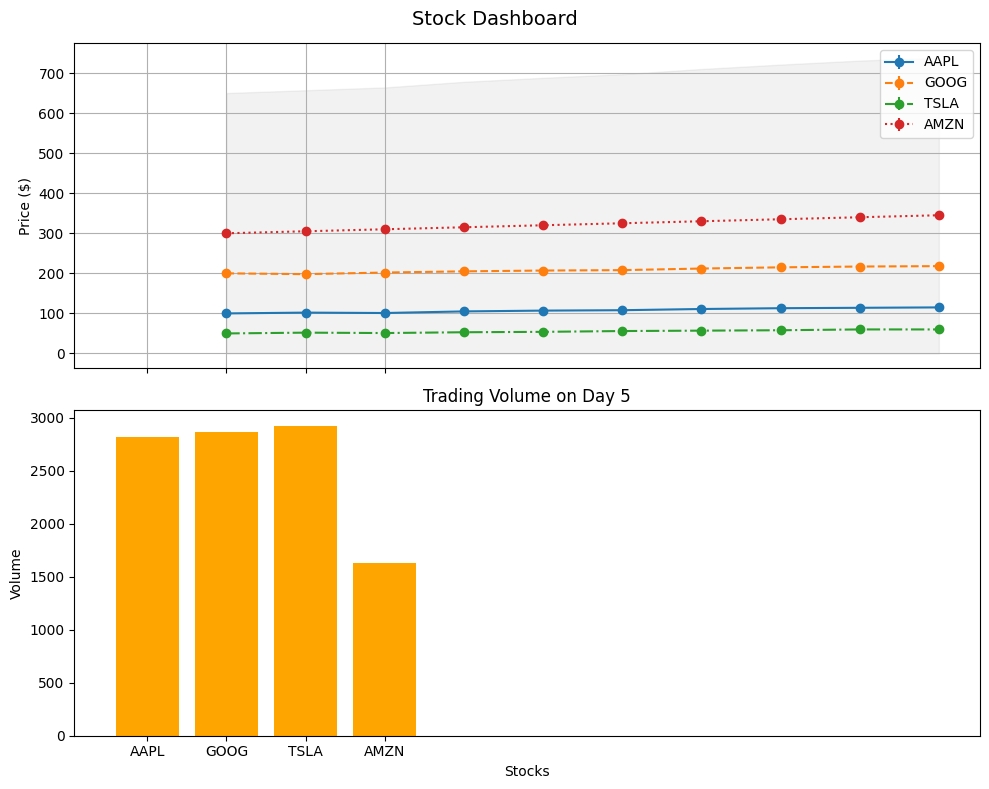

In [3]:
import numpy as np
import matplotlib.pyplot as plt

days = np.arange(1, 11)
stocks = ["AAPL", "GOOG", "TSLA", "AMZN"]

prices = np.array([
    [100, 200, 50, 300],
    [102, 198, 52, 305],
    [101, 202, 51, 310],
    [105, 205, 53, 315],
    [107, 207, 54, 320],
    [108, 208, 56, 325],
    [111, 212, 57, 330],
    [113, 215, 58, 335],
    [114, 217, 60, 340],
    [115, 218, 60, 345]
])

volumes = np.random.randint(1000, 5000, size=(10, 4))

class StockDashboard:
    def __init__(self, days, prices, volumes, stocks):
        self.days = days
        self.prices = prices
        self.volumes = volumes
        self.stocks = stocks

    def plot_prices(self):
        plt.figure(figsize=(8, 5))
        linestyles = ['-', '--', '-.', ':']

        for i in range(len(self.stocks)):
            plt.errorbar(
                self.days, self.prices[:, i],
                yerr=self.prices[:, i]*0.02, 
                label=self.stocks[i],
                linestyle=linestyles[i],
                marker='o'
            )

        plt.title("Stock Closing Prices with ±2% Error Bars")
        plt.xlabel("Days")
        plt.ylabel("Price ($)")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_volume_bar_day5(self):
        plt.figure(figsize=(6, 4))
        day = 5
        plt.bar(self.stocks, self.volumes[day-1], color='orange')
        plt.title(f"Trading Volume on Day {day}")
        plt.xlabel("Stock Name")
        plt.ylabel("Volume")
        plt.show()

    def plot_stacked_portfolio(self):
        plt.figure(figsize=(8, 5))
        portfolio_value = np.sum(self.prices, axis=1) 
        plt.stackplot(self.days, portfolio_value, colors=['lightblue'])

        max_day = self.days[np.argmax(portfolio_value)]
        max_value = np.max(portfolio_value)

        plt.annotate(
            f"Max value on Day {max_day}",
            xy=(max_day, max_value),
            xytext=(max_day+0.3, max_value+50),
            arrowprops=dict(facecolor='black', arrowstyle='->')
        )

        plt.title("Cumulative Portfolio Value")
        plt.xlabel("Days")
        plt.ylabel("Total Value ($)")
        plt.grid(True)
        plt.show()

    def plot_subplots(self):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
        fig.suptitle("Stock Dashboard", fontsize=14)

        linestyles = ['-', '--', '-.', ':']
        for i in range(len(self.stocks)):
            ax1.errorbar(
                self.days, self.prices[:, i],
                yerr=self.prices[:, i]*0.02,
                label=self.stocks[i],
                linestyle=linestyles[i],
                marker='o'
            )
        ax1.set_ylabel("Price ($)")
        ax1.legend()
        ax1.grid(True)

        portfolio_value = np.sum(self.prices, axis=1)
        ax1.fill_between(self.days, 0, portfolio_value, alpha=0.1, color='gray')

        day = 5
        ax2.bar(self.stocks, self.volumes[day-1], color='orange')
        ax2.set_title(f"Trading Volume on Day {day}")
        ax2.set_ylabel("Volume")
        ax2.set_xlabel("Stocks")

        plt.tight_layout()
        plt.show()

dashboard = StockDashboard(days, prices, volumes, stocks)
dashboard.plot_prices()
dashboard.plot_volume_bar_day5()
dashboard.plot_stacked_portfolio()
dashboard.plot_subplots()

Multi-Metric Weather Dashboard (Single City)

Scenario:
You have hourly weather data for one city over 24 hours: temperature, humidity, wind speed, and rainfall. Your task is to create a dashboard visualization using Matplotlib to analyze the city’s weather metrics.

Tasks:

Generate the Data:

Create hourly data for 24 hours:

Temperature: values around 20°C, with some daily variation (e.g., using sin function + noise).

Humidity: values around 50%, with some daily variation (e.g., using cos function + noise).

Wind Speed: random values between 5–20 km/h.

Rainfall: random integer values (e.g., 0–5 mm) or Poisson distribution.

Should write the code to generate these arrays themselves.

Line Plot:

Plot temperature over 24 hours.

Include ±5% error bars.

Highlight the maximum temperature with an annotation.

Scatter Plot:

Plot humidity vs temperature.

Use alpha transparency for clarity.

Bar Plot:

Plot wind speed at hours 6, 12, and 18.

Stacked Area Plot:

Show cumulative rainfall over 24 hours.

Highlight the hour with maximum rainfall.

Subplots Dashboard:

Create a 2x2 subplot layout:

Top-left: Temperature line plot with error bars

Top-right: Humidity scatter plot

Bottom-left: Wind speed bar plot

Bottom-right: Rainfall stacked area plot

Normalization:

Create a normalized version of temperature and plot it in a separate figure.

Encapsulation:

Wrap your plotting code into a class WeatherDashboard.

Include methods for each plot and the dashboard.

Plot a 3D surface of temperature vs humidity vs hour for the city.

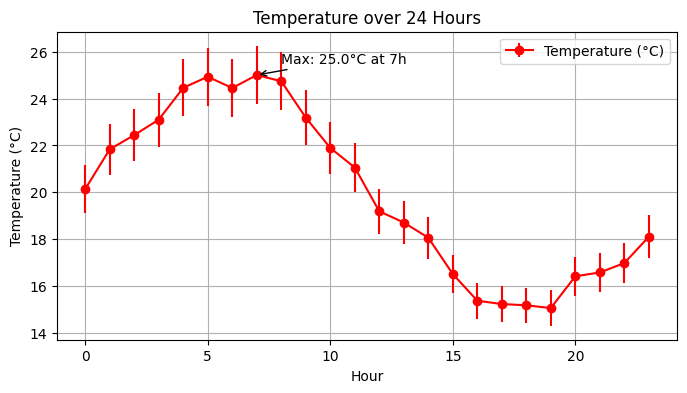

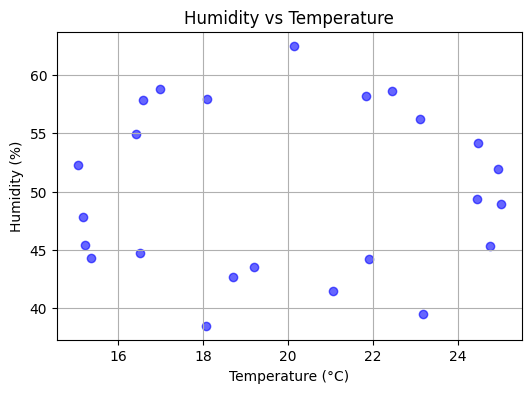

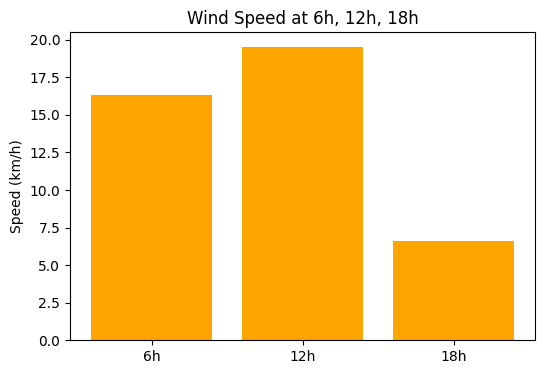

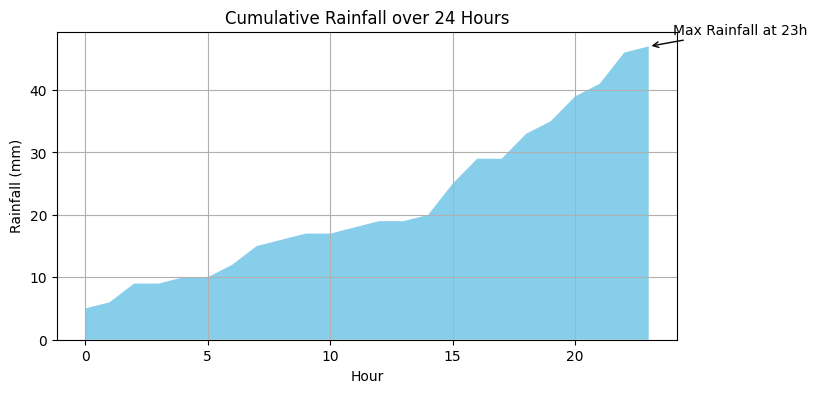

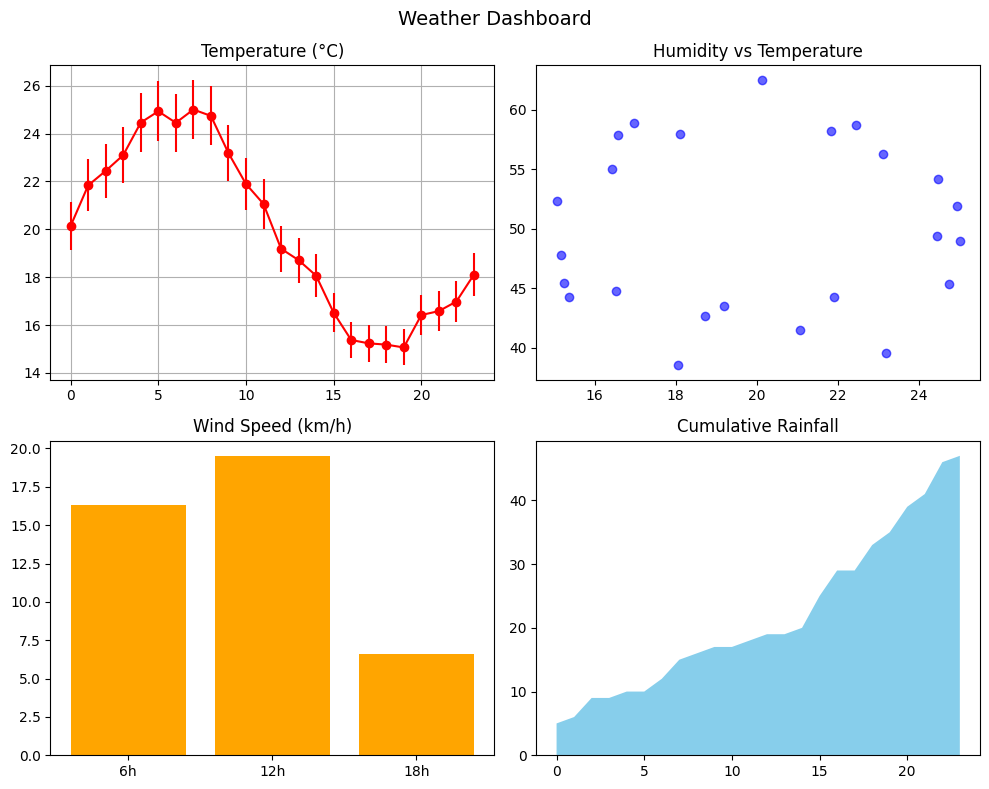

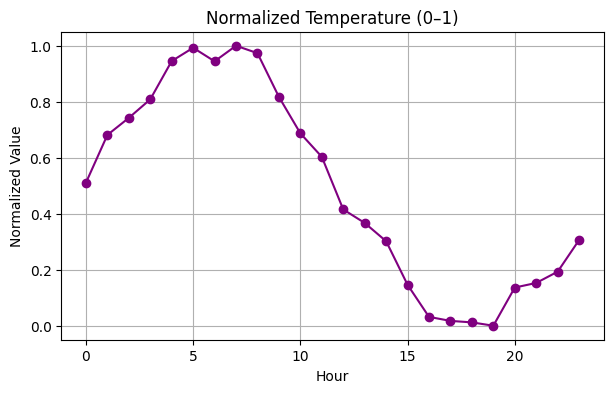

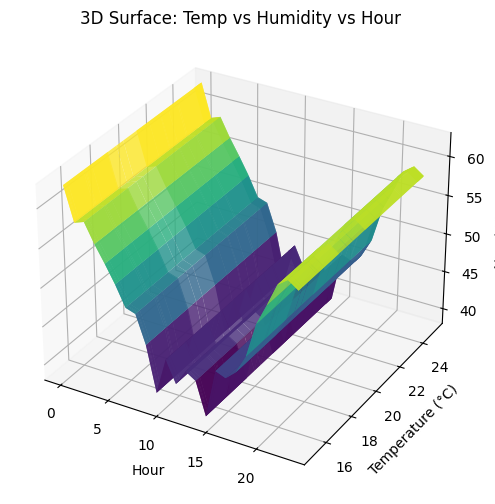

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

hours = np.arange(0, 24)

temperature = 20 + 5 * np.sin(hours / 24 * 2 * np.pi) + np.random.normal(0, 0.5, 24)

humidity = 50 + 10 * np.cos(hours / 24 * 2 * np.pi) + np.random.normal(0, 2, 24)

wind_speed = np.random.uniform(5, 20, 24)

rainfall = np.random.randint(0, 6, 24)

class WeatherDashboard:
    def __init__(self, hours, temperature, humidity, wind_speed, rainfall):
        self.hours = hours
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed
        self.rainfall = rainfall

    def plot_temperature(self):
        plt.figure(figsize=(8, 4))
        plt.errorbar(
            self.hours,
            self.temperature,
            yerr=self.temperature * 0.05,
            label="Temperature (°C)",
            color='r',
            marker='o'
        )

        max_hour = self.hours[np.argmax(self.temperature)]
        max_temp = np.max(self.temperature)

        plt.annotate(
            f'Max: {max_temp:.1f}°C at {max_hour}h',
            xy=(max_hour, max_temp),
            xytext=(max_hour+1, max_temp+0.5),
            arrowprops=dict(facecolor='black', arrowstyle='->')
        )

        plt.title("Temperature over 24 Hours")
        plt.xlabel("Hour")
        plt.ylabel("Temperature (°C)")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_humidity_scatter(self):
        plt.figure(figsize=(6, 4))
        plt.scatter(self.temperature, self.humidity, color='blue', alpha=0.6)
        plt.title("Humidity vs Temperature")
        plt.xlabel("Temperature (°C)")
        plt.ylabel("Humidity (%)")
        plt.grid(True)
        plt.show()

    def plot_wind_bar(self):
        plt.figure(figsize=(6, 4))
        hours_selected = [6, 12, 18]
        plt.bar(
            [f"{h}h" for h in hours_selected],
            [self.wind_speed[h] for h in hours_selected],
            color='orange'
        )
        plt.title("Wind Speed at 6h, 12h, 18h")
        plt.ylabel("Speed (km/h)")
        plt.show()

    def plot_rainfall_area(self):
        plt.figure(figsize=(8, 4))
        cumulative_rainfall = np.cumsum(self.rainfall)
        plt.stackplot(self.hours, cumulative_rainfall, colors=['skyblue'])

        max_hour = self.hours[np.argmax(cumulative_rainfall)]
        max_rain = np.max(cumulative_rainfall)

        plt.annotate(
            f'Max Rainfall at {max_hour}h',
            xy=(max_hour, max_rain),
            xytext=(max_hour+1, max_rain+2),
            arrowprops=dict(facecolor='black', arrowstyle='->')
        )

        plt.title("Cumulative Rainfall over 24 Hours")
        plt.xlabel("Hour")
        plt.ylabel("Rainfall (mm)")
        plt.grid(True)
        plt.show()

    def plot_subplots_dashboard(self):
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))
        fig.suptitle("Weather Dashboard", fontsize=14)

        axs[0, 0].errorbar(self.hours, self.temperature, yerr=self.temperature*0.05, color='r', marker='o')
        axs[0, 0].set_title("Temperature (°C)")
        axs[0, 0].grid(True)

        axs[0, 1].scatter(self.temperature, self.humidity, color='blue', alpha=0.6)
        axs[0, 1].set_title("Humidity vs Temperature")

        hours_selected = [6, 12, 18]
        axs[1, 0].bar(
            [f"{h}h" for h in hours_selected],
            [self.wind_speed[h] for h in hours_selected],
            color='orange'
        )
        axs[1, 0].set_title("Wind Speed (km/h)")

        cumulative_rainfall = np.cumsum(self.rainfall)
        axs[1, 1].stackplot(self.hours, cumulative_rainfall, colors=['skyblue'])
        axs[1, 1].set_title("Cumulative Rainfall")

        plt.tight_layout()
        plt.show()

    def plot_normalized_temperature(self):
        plt.figure(figsize=(7, 4))
        temp_norm = (self.temperature - np.min(self.temperature)) / (np.max(self.temperature) - np.min(self.temperature))
        plt.plot(self.hours, temp_norm, color='purple', marker='o')
        plt.title("Normalized Temperature (0–1)")
        plt.xlabel("Hour")
        plt.ylabel("Normalized Value")
        plt.grid(True)
        plt.show()

    def plot_3d_surface(self):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        H, T = np.meshgrid(self.humidity, self.temperature)
        X = np.tile(self.hours, (24, 1))

        ax.plot_surface(X, T, H, cmap='viridis', alpha=0.8)
        ax.set_title("3D Surface: Temp vs Humidity vs Hour")
        ax.set_xlabel("Hour")
        ax.set_ylabel("Temperature (°C)")
        ax.set_zlabel("Humidity (%)")
        plt.show()


dashboard = WeatherDashboard(hours, temperature, humidity, wind_speed, rainfall)
dashboard.plot_temperature()
dashboard.plot_humidity_scatter()
dashboard.plot_wind_bar()
dashboard.plot_rainfall_area()
dashboard.plot_subplots_dashboard()
dashboard.plot_normalized_temperature()
dashboard.plot_3d_surface()